---
title: "Softmax Function"
description: "Basic Softmax Function along with an example."
jupyter: python3
author: "Vraj Shah"
date: "9/2/2023"
---

### Import Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Function

$$ \large
a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }}
$$

In [16]:
def softmax(z):
    ez = np.exp(z)
    sm = ez/np.sum(ez)
    return (sm)

### Example

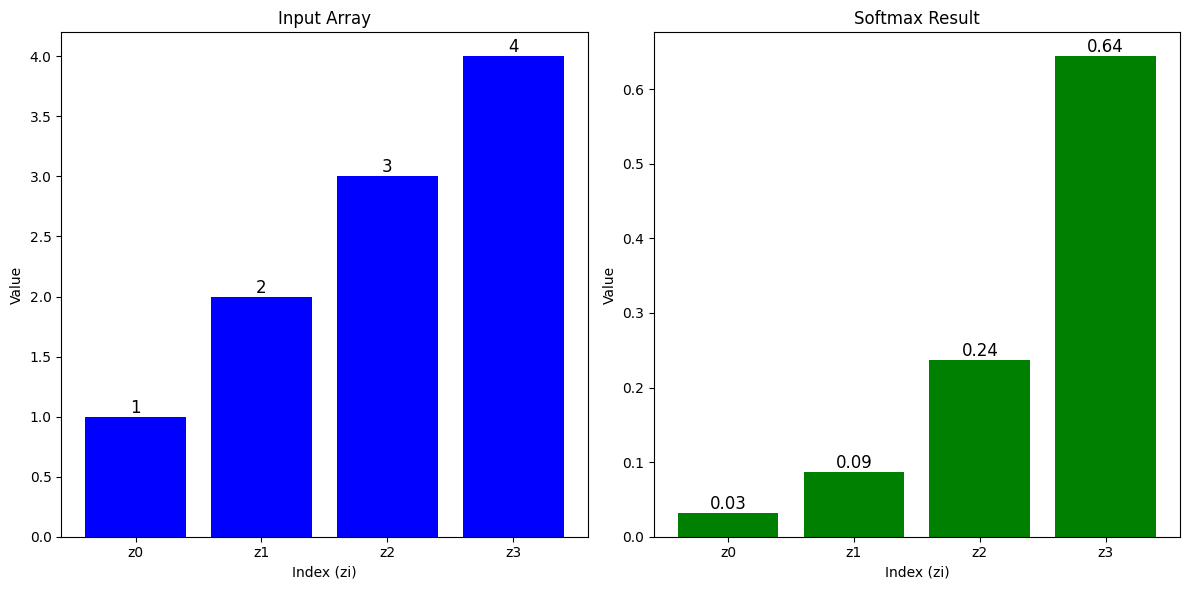

In [17]:
input_array = np.array([1, 2, 3, 4])
softmax_result = softmax(input_array)

custom_labels = ['z0', 'z1', 'z2', 'z3']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(np.arange(len(input_array)), input_array,
           tick_label=custom_labels, color='b')
axs[0].set_title('Input Array')
axs[0].set_xlabel('Index (zi)')
axs[0].set_ylabel('Value')
for i, v in enumerate(input_array):
    axs[0].text(i, v, str(v), ha='center', va='bottom', fontsize=12)

axs[1].bar(np.arange(len(softmax_result)), softmax_result,
           tick_label=custom_labels, color='g')
axs[1].set_title('Softmax Result')
axs[1].set_xlabel('Index (zi)')
axs[1].set_ylabel('Value')
for i, v in enumerate(softmax_result):
    axs[1].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### Cost Function

$$
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases}
$$

$$
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right]
$$

In [18]:
def loss(x, y):
    a = softmax(x)
    epsilon = 1e-15  # Small constant to avoid taking log(0)
    return -math.log(a[y] + epsilon)

In [19]:
def cost_fxn(X, y):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        cost += loss(X[i], y[i])

    cost = cost / m
    return cost

### Dataset

In [20]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(
    n_samples=2000, centers=centers, cluster_std=1.0, random_state=30)

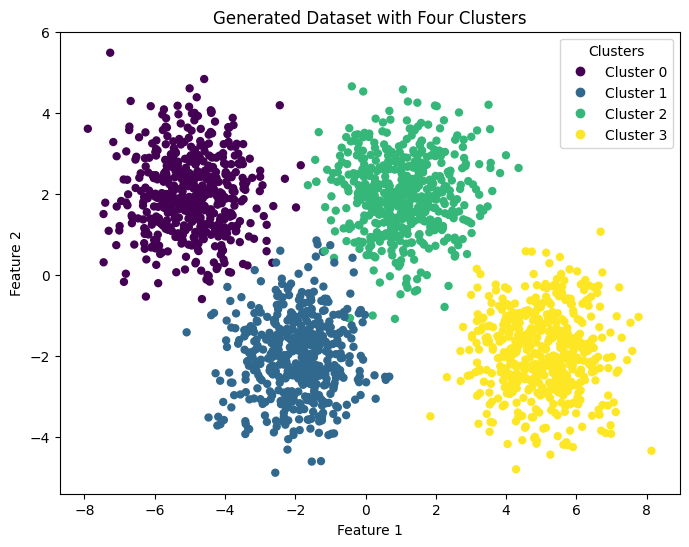

In [21]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train[:, 0], X_train[:, 1],
                      c=y_train, cmap='viridis', marker='o', s=25)

legend_labels = [f'Cluster {i}' for i in range(len(centers))]
plt.legend(handles=scatter.legend_elements()[
           0], labels=legend_labels, title="Clusters")

plt.title("Generated Dataset with Four Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

### Models

In [22]:
model1 = Sequential(
    [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(4, activation='softmax')        # <-- softmax activation here
    ]
)
model1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model1.fit(
    X_train, y_train,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 1.0357
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4241
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1823
Epoch 4/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0980
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0683
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0426
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0300


In [23]:
model2 = Sequential(
    [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(4, activation='linear')         # <-- linear activation here
    ]
)
model2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model2.fit(
    X_train, y_train,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 1.0976
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4926
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.2572
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1406
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0897
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0672
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0547
Epoch 8/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0422
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0381


### Outputs

In [24]:
p_preferred = model1.predict(X_train)
data = []

for i in range(5):
    row = {
        'Prediction': p_preferred[i],
        'Category': np.argmax(p_preferred[i]),
        'Max': np.max(p_preferred[i]),
        'Min': np.min(p_preferred[i])
    }
    data.append(row)

df = pd.DataFrame(data)

print(df)

print("")

y_pred = np.argmax(p_preferred, axis=1)
correct_predictions = np.sum(y_pred == y_train)
total_predictions = len(y_train)
error_percentage = (1 - (correct_predictions / total_predictions)) * 100
print("Error percentage =", error_percentage, "%")

63/63 [==============================] - 0s 2ms/step
                                               Prediction  Category       Max  \
0        [0.00076469, 0.0032128657, 0.981888, 0.01413442]         2  0.981888   
1  [0.9984345, 0.0015346134, 2.1353391e-05, 9.585833e-06]         0  0.998434   
2  [0.9823111, 0.017138032, 0.00038771704, 0.00016316074]         0  0.982311   
3  [0.0013412955, 0.99340725, 0.004864373, 0.00038706747]         1  0.993407   
4  [0.003443484, 0.00016099671, 0.9962613, 0.00013426131]         2  0.996261   

        Min  
0  0.000765  
1  0.000010  
2  0.000163  
3  0.000387  
4  0.000134  

Error percentage = 0.8499999999999952 %


In [25]:
p_preferred = model2.predict(X_train)
data = []

for i in range(5):
    row = {
        'Prediction': p_preferred[i],
        'Category': np.argmax(p_preferred[i]),
        'Max': np.max(p_preferred[i]),
        'Min': np.min(p_preferred[i])
    }
    data.append(row)

df = pd.DataFrame(data)

print(df)

print("")

y_pred = np.argmax(p_preferred, axis=1)
correct_predictions = np.sum(y_pred == y_train)
total_predictions = len(y_train)
error_percentage = (1 - (correct_predictions / total_predictions)) * 100
print("Error percentage =", error_percentage, "%")

63/63 [==============================] - 0s 2ms/step
                                         Prediction  Category       Max  \
0     [-4.3254666, 0.14574976, 3.842623, -0.401972]         2  3.842623   
1     [6.7959185, 1.1274883, -5.037459, -2.7135649]         0  6.795918   
2     [4.8487134, 1.3494179, -3.651421, -2.2844274]         0  4.848713   
3  [-2.8908267, 4.823671, -0.023022205, -1.1583089]         1  4.823671   
4     [-1.3442385, 0.3332066, 4.854504, -3.0173476]         2  4.854504   

        Min  
0 -4.325467  
1 -5.037459  
2 -3.651421  
3 -2.890827  
4 -3.017348  

Error percentage = 1.0499999999999954 %
